<a href="https://colab.research.google.com/github/sseyler0119/Data-Science-Projects/blob/master/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
house_data = pd.read_csv('https://raw.githubusercontent.com/sseyler0119/datasets/master/kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
house_data.drop(['id', 'lat', 'long', 'zipcode'], inplace=True, axis=1) # drop irrelevant columns from dataframe
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [20]:
house_data.info() # overview of columns and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 

In [21]:
house_data['date'] = pd.to_datetime(house_data['date']) # convert date column to datetime
house_data['house_age'] = house_data['date'].dt.year - house_data['yr_built'] # create house age column and calculate the house's age

house_data.drop('date', inplace=True, axis=1) # remove date and yr_built columns from dataframe, we no longer need them
house_data = house_data.drop('yr_built', axis=1)

In [22]:
# create renovated column, populated with boolean yr_renovated values
house_data['renovated'] = house_data['yr_renovated'].apply(lambda x:0 if x == 0 else 1) 
house_data.drop('yr_renovated', inplace=True, axis=1) # drop yr_renovated from table, we no longer need it  

In [23]:
house_data[['renovated', 'house_age']].sample(10) # view sample of house age and renovation

,renovated,house_age
19688,0,7
12970,0,40
3879,0,90
1075,0,76
5843,0,57
16308,1,76
7539,0,97
8454,0,20
13822,0,24
2756,0,32


In [24]:
# save processed data
#house_data.to_csv('datasets/house_data_processed.csv', index=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


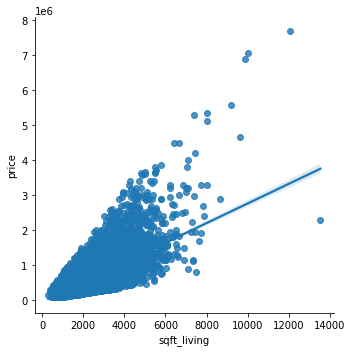

In [25]:
# regression plot sqft vs price
sns.lmplot('sqft_living', 'price', house_data) # linear relationship exists between these two variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


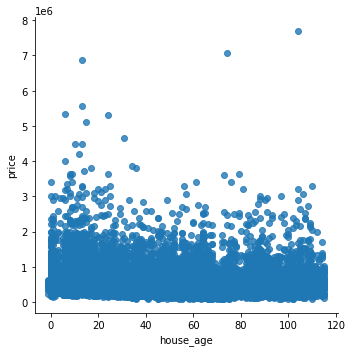

In [26]:
sns.lmplot('house_age', 'price', house_data)# no clear linear relationship between price and house_age visible from this plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


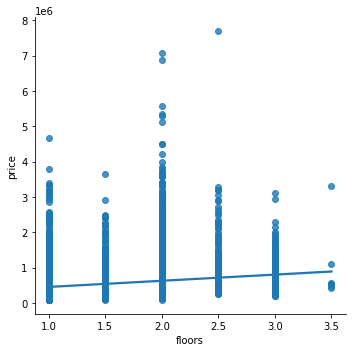

In [27]:
sns.lmplot('floors', 'price', house_data) # no clear linear relationship between # of floors and price visible from this plot

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [29]:
X = house_data[['sqft_living']] # predictive variable
y = house_data['price'] 

In [30]:
X.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [31]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

Split the data set

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% to train model, 20% to test the model

In [33]:
scaler = StandardScaler() # instantiate scaler object
X_train = scaler.fit_transform(X_train) # standardize the training data 

In [34]:
X_test = scaler.fit_transform(X_test) # standardize the test data

In [35]:
linear_regression = LinearRegression() # instantiate linear regression object

model = linear_regression.fit(X_train, y_train) # train the model
y_pred = model.predict(X_test) # predict y values using X_test data

In [36]:
# compare actual data to test data
df = pd.DataFrame({'test': y_test, 'predicted': y_pred}) # set up dataframe with test data and predicted data
df.sample(10)

,test,predicted
16166,329950.0,5.306374e+05
12511,356000.0,6.494396e+05
10700,274900.0,4.712362e+05
20563,1240420.0,1.588543e+06
17628,280000.0,4.061779e+05
15697,300000.0,1.544303e+05
11537,460000.0,4.570931e+05
15432,660000.0,5.985243e+05
5497,230000.0,4.966939e+05
4114,365070.0,6.596226e+05


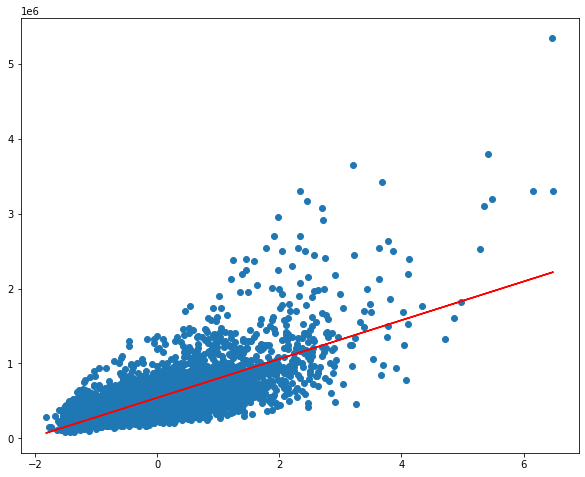

In [37]:
# visualize the data using a scatterplot with a line
plt.figure(figsize=(10, 8))

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

plt.show()

Calculate the r2 score

In [38]:
print("Training score: ", linear_regression.score(X_train, y_train)) # r2 score for training data

Training score:  0.49230352829350255


In [39]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred) 

print("Testing score: ", score) # r2 score for testing data is close to the training data

Testing score:  0.49507922104232993


In [40]:
theta_0 = linear_regression.coef_ # regression coefficient
theta_0

array([258843.17734136])

In [41]:
intercept = linear_regression.intercept_ # y-intercept
intercept 

540393.2597455176

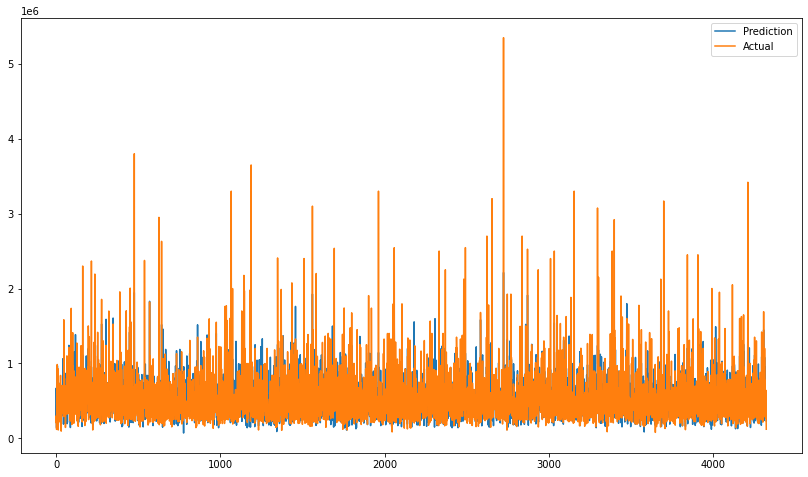

In [42]:
# line plot with actual vs predicted values
plt.subplots(figsize=(14, 8))

plt.plot(y_pred, label="Prediction")
plt.plot(y_test.values, label="Actual")

plt.legend()

plt.show()

Perform linear regression with single predictor analyticaly fitting regression forumla y = mx + b

In [45]:
import statsmodels.api as sm

In [46]:
X_train[:5]

array([[-0.59695762],
       [-0.10742701],
       [ 0.92602651],
       [-0.15094084],
       [-0.60783608]])

In [47]:
X_train = sm.add_constant(X_train) # column of 1 represents the intercept 
X_train[:5]

array([[ 1.        , -0.59695762],
       [ 1.        , -0.10742701],
       [ 1.        ,  0.92602651],
       [ 1.        , -0.15094084],
       [ 1.        , -0.60783608]])

In [49]:
# least squares regression 

model = sm.OLS(y_train, X_train).fit() # build regression model

print(model.summary())
# results show that R-Squared and adjusted R-Squared values match those we previously found
# p-value of 0 shows that the regression analysis was significant

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.676e+04
Date:                Fri, 18 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:09:56   Log-Likelihood:            -2.4030e+05
No. Observations:               17290   AIC:                         4.806e+05
Df Residuals:                   17288   BIC:                         4.806e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.404e+05   1999.171    270.309      0.0

In [51]:
# compare coefficient and intercept values to those in the model
theta_0, intercept # values are almost the same 2.588e+05 and 5.404e+05 

(array([258843.17734136]), 540393.2597455176)